In [2]:
from turkish_morphology import decompose, analyze

word = "kitaplarımızdaki"
word = "yapamadıklarımızdan"
sentence = "Yazarın kitaplarını yayın hakkını elinde bulunduran Aziz Nesin Vakfı'ndan yapılan açıklamaya göre,ilki 1946 yılında basılan Aziz Nesin'in kitapları, o dönemden bu yana 10 milyon 780 bin adet basıldı ve dağıtıldı"
word = "dersindeyim"

analyses = analyze.surface_form(word, use_proper_feature=False)
decomposition = decompose.human_readable_analysis(analyses[0])

analyses
# decomposition

['(de[VB]+[Polarity=Pos])([VN]-r[Derivation=AorNom]+[PersonNumber=A3sg]+[Possessive=Pnon]+[Case=Bare])([NOMP]-sH[Derivation=Sim]+[PersonNumber=A3sg]+Hn[Possessive=P2sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])',
 '(ders[NOMP]+[PersonNumber=A3sg]+Hn[Possessive=P2sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])',
 '(ders[NOMP]+[PersonNumber=A3sg]+SH[Possessive=P3sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])']

In [3]:
from morphology import decompose_tr

decomposition = decompose_tr(word)
decomposition

[Decomposition(root=ders, pos=NOMP, meta_morphemes=['SH', 'NDA', 'YHm'], morphemes=['i', 'nde', 'yim']),
 Decomposition(root=ders, pos=NOMP, meta_morphemes=['Hn', 'NDA', 'YHm'], morphemes=['in', 'de', 'yim']),
 Decomposition(root=de, pos=NOMP, meta_morphemes=['r', 'sH', 'Hn', 'NDA', 'YHm'], morphemes=['r', 'si', 'n', 'de', 'yim']),
 Decomposition(root=de, pos=NOMP, meta_morphemes=['r', 'sH', 'Hn', 'NDA', 'YHm'], morphemes=['r', 'si', 'n', 'de', 'yim'])]

In [ ]:
import pandas as pd

data = pd.read_csv("data/bilkent-turkish-writings/bilkent-turkish-writings-dataset.csv")
data.head()

In [ ]:
import re
from utils import write_json

essays = []

for i, row in data.iterrows():
    if isinstance(row["text"], str):
        raw_texts = re.split("[.?!]\s",row["text"].replace("\r\n", ""))
        texts = []

        for text in raw_texts:
            texts.extend(re.split("\s\s\s\s", text))

        texts = [re.sub("^[A-ZÜÖĞIŞÇİ0-9\-\s.]+$", "", text) for text in texts]
        texts = [re.sub("\s+", " ", text).strip() for text in texts if all(["http" not in text.lower(), "kaynakça" not in text.lower()]) and len(text.strip().split()) > 5]
        
        if len(texts) > 1:
            essays.append({
                "id": f"bilkent-turkish-writings-{i}",
                "sentences": texts
            })

write_json(essays, "data/bilkent-turkish-writings/bilkent-turkish-writings-dataset.json", ensure_ascii=False)


In [ ]:
from morphology import decompose_tr

# decompose_tr("heykelciklerinin")
[decomposition.to_json() for decomposition in decompose_tr("yansıttığımızın")]

In [ ]:
from utils import read_json

data = read_json("../data/bilkent-turkish-writings/bilkent-turkish-writings-dataset_prep.json")

In [ ]:
len(data), sum([len(val) for val in data.values()])

In [ ]:
sum([1 for root, word_map in data.items() for word, decompositions in word_map.items() if len(decompositions) == 1 and decompositions[0]["morphemes"]])

In [ ]:
from utils import write_json
import pathlib

pathlib.Path("../data/bilkent-turkish-writings/batches").mkdir(parents=True, exist_ok=True)
i = 0
while True:
    data_chunk = list(data.items())[i*500:(i+1)*500]
    if data_chunk:
        write_json(dict(data_chunk), f"../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_{i}.json", ensure_ascii=False)
        i += 1
    else:
        break

In [1]:
from utils import write_json
from prepare_data_for_morph import post_morph_process

new_data = post_morph_process("../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_0.json")

write_json(new_data, "../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_0_new.json", ensure_ascii=False)

In [2]:
from src.utils import read_json, write_json

data = read_json("../data/bilkent-turkish-writings/btwd_prep.json")

output_data = {
    "metadata": {
        "source": "../data/bilkent-turkish-writings/btwd.json",
        "processor": "tr_btwd_prep",
        "language": "tr"
    },
    "data": data
}
write_json(output_data, "../data/bilkent-turkish-writings/btwd_prep.json", ensure_ascii=False)

In [ ]:
from src.utils import read_json, write_json

data = read_json("outputs/gpt-3.5/tr/btwd/btwd_prep_post_morph_sample_llm_morph_gen_en_one_shot_gpt-3.5-turbo_2094783b7ba0.json")
write_json(data, "outputs/gpt-3.5/tr/btwd/btwd_prep_post_morph_sample_llm_morph_gen_en_one_shot_gpt-3.5-turbo_2094783b7ba0.json", ensure_ascii=False)

In [3]:
import pandas as pd

data = pd.read_excel("../data/MorphoLEX_en.xlsx", sheet_name="0-1-2")

/Users/mismayil/.pyenv/versions/3.9.7/envs/til/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
data.head()

,ELP_ItemID,Word,POS,Nmorph,PRS_signature,MorphoLexSegm,ROOT1_PFMF,ROOT1_FamSize,ROOT1_Freq_HAL,SUFF1_PFMF,...,SUFF1_Freq_HAL,SUFF1_length,SUFF1_P,SUFF1_P*,SUFF2_PFMF,SUFF2_FamSize,SUFF2_Freq_HAL,SUFF2_length,SUFF2_P,SUFF2_P*
0,4,algebraical,JJ,3,"0,1,2",{(algebra)}>ic>>al>,100.0,4,3692,88.450148,...,1472797,2,0.000028,0.006334,91.538462,1431,4704731,2,0.000009,0.006643
1,61,allowably,RB,3,"0,1,2",{(allow)}>able>>y>,100.0,5,185956,88.978186,...,1227992,4,0.000032,0.006025,73.641851,2486,3870233,1,0.000050,0.029816
2,69,allusively,RB,3,"0,1,2",{(allude)}>ive>>ly>,100.0,4,2066,92.746114,...,1037354,3,0.000017,0.002781,80.980324,2898,3857999,2,0.000045,0.026726
3,94,alphabetically,RB,3,"0,1,2",{(alphabet)}>al>>ly>,50.0,5,6877,30.279720,...,4704731,2,0.000009,0.006643,13.496721,2898,3857999,2,0.000045,0.026726
4,116,altercations,NN,3,"0,1,2",{(alterc)>ate>}>ion>,0.0,2,187,56.623932,...,2569118,3,0.000026,0.010505,58.322904,1599,6530204,3,0.000009,0.009115


In [6]:
words = []

for i, row in data.iterrows():
    word = row["Word"]
    segmentation = row["MorphoLexSegm"]
    morphemes = re.findall(r"[A-Za-z]+", segmentation)
    if word == "".join(morphemes):
        words.append({
            "word": word,
            "morphemes": morphemes
        })

In [8]:
words[:10]

[{'word': 'algebraical', 'morphemes': ['algebra', 'ic', 'al']},
 {'word': 'altruistic', 'morphemes': ['altru', 'ist', 'ic']},
 {'word': 'amateurishly', 'morphemes': ['amateur', 'ish', 'ly']},
 {'word': 'ambassadorship', 'morphemes': ['ambassad', 'or', 'ship']},
 {'word': 'ambitiousness', 'morphemes': ['ambit', 'ious', 'ness']},
 {'word': 'woodenly', 'morphemes': ['wood', 'en', 'ly']},
 {'word': 'woodenness', 'morphemes': ['wood', 'en', 'ness']},
 {'word': 'wordlessly', 'morphemes': ['word', 'less', 'ly']},
 {'word': 'workableness', 'morphemes': ['work', 'able', 'ness']},
 {'word': 'worthlessly', 'morphemes': ['worth', 'less', 'ly']}]

In [5]:
import re

s = "{(algebra)}>ic>>al>"
matches = re.findall(r"[A-Za-z]+", s)
print(matches)

['algebra', 'ic', 'al']


In [3]:
from src.utils import read_json, write_json

data = read_json("experiments/data/en/morpholex/MorphoLEX_en_prep_morph_sample_nonce.json")

for i, sample in enumerate(data["data"]):
    sample["id"] = f"morpholex-ood-{i}"

write_json(data, "experiments/data/en/morpholex/MorphoLEX_en_prep_morph_sample_nonce.json", ensure_ascii=False)

In [1]:
from src.utils import read_json, write_json

data = read_json("experiments/data/tr/btwd/btwd_prep_post_comp_morph_sample_nonce.json")

for i, sample in enumerate(data["data"]):
    sample["id"] = f"tr-ood-{i}"

write_json(data, "experiments/data/tr/btwd/btwd_prep_post_comp_morph_sample_nonce.json", ensure_ascii=False)

In [10]:
import networkx as nx

G = nx.MultiDiGraph()
G.add_node("gel", id=1, root=True)
G.add_node("yap", id=2, root=True)
G.add_node("DH", id=3)
G.add_node("lAr", id=4)
G.add_node("mHs", id=5)

In [11]:
G.add_edges_from([("gel", "DH", {"route": "1-3"}), ("DH", "lAr", {"route": "1-3-4"}), ("yap", "DH", {"route": "2-3"}), ("yap", "mHs", {"route": "2-5"}), ("mHs", "lAr", {"route": "2-5-4"})])

[0, 0, 0, 0, 0]

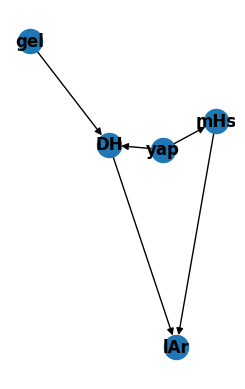

In [12]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [13]:
roots = [node for node, data in G.nodes(data=True) if data.get("root")]

In [15]:
roots[0].neighbors()

AttributeError: 'str' object has no attribute 'neighbors'